## Context

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

I am required to help the manager to predict the right group of the new customers.

## Ask Phase
**Shareholders**
* Manager
* Sales Team

**Question**
* What is the classifying criteria for the 4 segments and what is the right groups for the new potential customers?

**Dataset** 
<br>I will be using the **Train.csv** and **Test.csv** data from the **Customer Segregation Classfication** dataset available on **Kaggle**.

## Importing Libraries

In [1]:
# For Data Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# For Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Importing dataset

Train.csv contains data of the existing customers while Test.csv contains the data of the new customers.

In [2]:
train_df = pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')
test_df = pd.read_csv('/kaggle/input/customer-segmentation/Test.csv')

In [3]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


## Data Cleaning

### Checking for duplicates
I will be checking for duplicates using the ID column because each customer's ID should be unique. There are 0 duplicates found in both datasets.

In [7]:
train_df['ID'].duplicated().sum()

0

In [8]:
test_df['ID'].duplicated().sum()

0

### Checking for null values
There are multiple NaN values found in Train.csv and Test.csv. In the real-world situation, I would try to obtain the missing values from the company or the dataset provider.

For this analysis, I can choose to fill or drop the NaN values.

I chose to remove the rows with null values.

In [9]:
train_df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [10]:
train_df_cleaned = train_df.copy().dropna()
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [11]:
test_df_cleaned = test_df.copy().dropna()
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
 10  Segmentation     2154 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 201.9+ KB


### Checking for misspelled or unusual values in columns
There are no misspelled or unusual values found.

In [12]:
train_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
train_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
train_df_cleaned['Age'].unique()

array([22, 67, 56, 32, 33, 61, 55, 26, 19, 58, 41, 31, 79, 49, 18, 36, 35,
       45, 42, 83, 27, 28, 47, 40, 57, 76, 25, 48, 74, 59, 51, 30, 63, 52,
       39, 38, 60, 68, 86, 43, 80, 37, 46, 72, 69, 50, 29, 71, 78, 82, 70,
       23, 20, 21, 53, 75, 65, 89, 62, 66, 73, 77, 87, 84, 88, 85, 81])

In [15]:
train_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
train_df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [17]:
train_df_cleaned['Work_Experience'].unique()

array([ 1.,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,  6.,
       10., 11.])

In [18]:
train_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [19]:
train_df_cleaned['Family_Size'].unique()

array([4., 1., 2., 3., 5., 6., 8., 7., 9.])

In [20]:
train_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

### Classifying ages into bins for analysis

In [21]:
train_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

### Categorising Age into bins

In [22]:
# Putting ages into bins for analysis

# Creating bins
bin_edges = [0, 18, 24, 34, 44, 54, 64, 100]
bin_labels = ['Below 18', '19-24', '25-34', '35-44', '45-54', '55-64', '65 and above']

# Creating a new column in the dataframe using pd.cut
train_df_cleaned.loc[:,'Age_Groups'] = pd.cut(train_df_cleaned['Age'], bins=bin_edges, labels=bin_labels, right=False)
test_df_cleaned.loc[:,'Age_Groups'] = pd.cut(test_df_cleaned['Age'], bins=bin_edges, labels=bin_labels, right=False)

In [23]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               6665 non-null   int64   
 1   Gender           6665 non-null   object  
 2   Ever_Married     6665 non-null   object  
 3   Age              6665 non-null   int64   
 4   Graduated        6665 non-null   object  
 5   Profession       6665 non-null   object  
 6   Work_Experience  6665 non-null   float64 
 7   Spending_Score   6665 non-null   object  
 8   Family_Size      6665 non-null   float64 
 9   Var_1            6665 non-null   object  
 10  Segmentation     6665 non-null   object  
 11  Age_Groups       6665 non-null   category
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 631.7+ KB


In [24]:
test_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2154 non-null   int64   
 1   Gender           2154 non-null   object  
 2   Ever_Married     2154 non-null   object  
 3   Age              2154 non-null   int64   
 4   Graduated        2154 non-null   object  
 5   Profession       2154 non-null   object  
 6   Work_Experience  2154 non-null   float64 
 7   Spending_Score   2154 non-null   object  
 8   Family_Size      2154 non-null   float64 
 9   Var_1            2154 non-null   object  
 10  Segmentation     2154 non-null   object  
 11  Age_Groups       2154 non-null   category
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 204.4+ KB


## Preliminary Data Visualisation
We will have a look at the proportions of each factors in the different Segmentation Groups

In [25]:
# Defining a function to create stacked bar plots
def plot_stacked_barplots(df, column1, column2, title):
    grouped = df.groupby([column1, column2]).size().unstack()
    ax = grouped.plot(kind='bar', stacked='True', edgecolor='black')
    
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    
    plt.xlabel(column1)
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

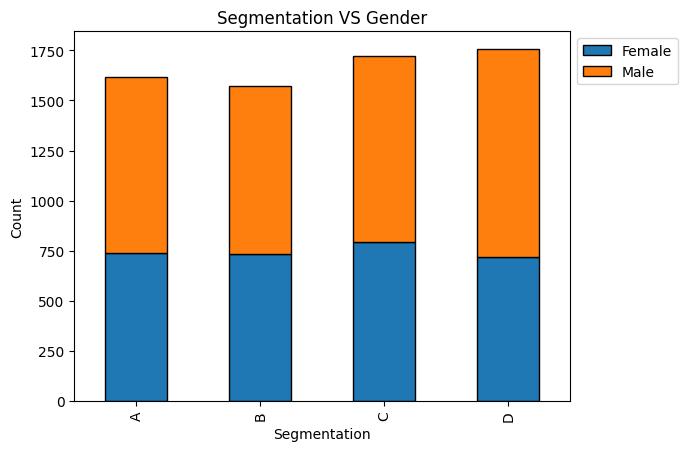

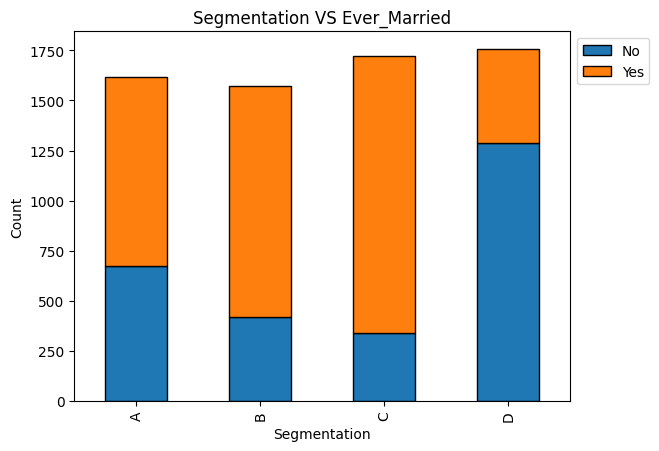

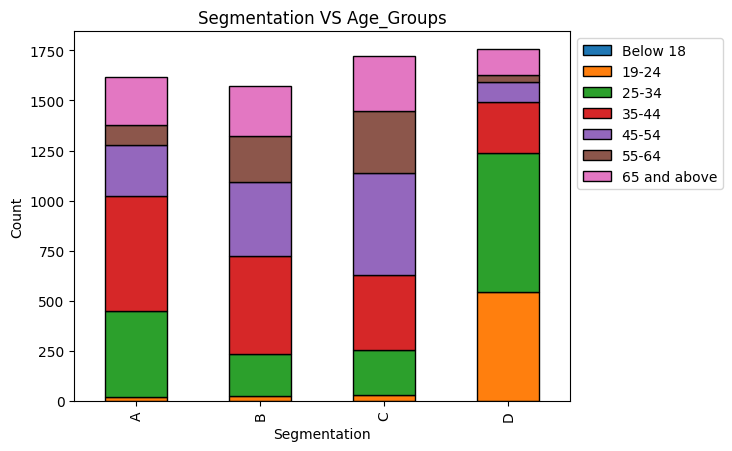

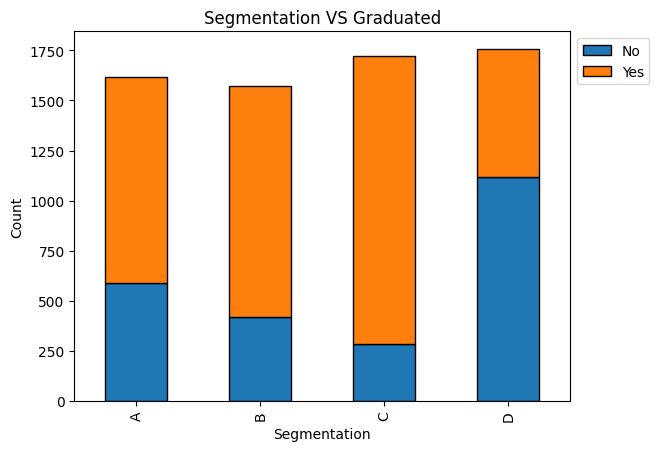

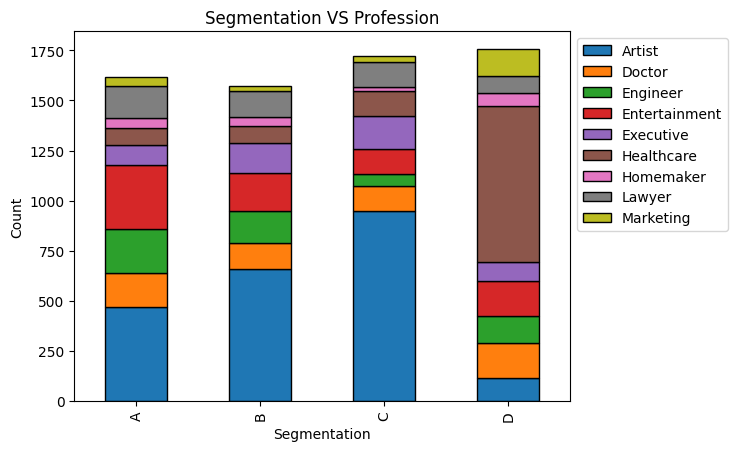

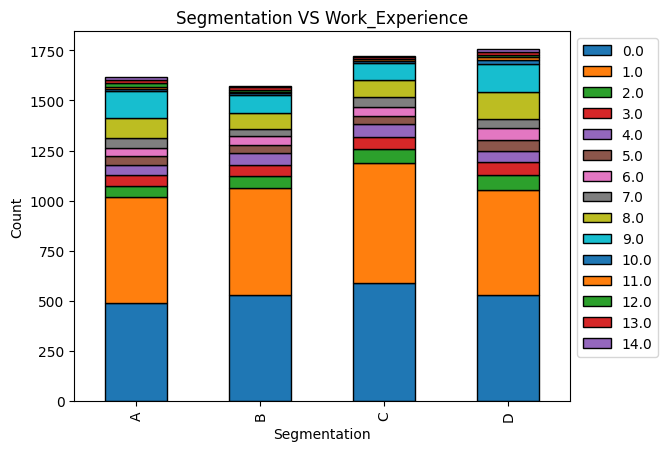

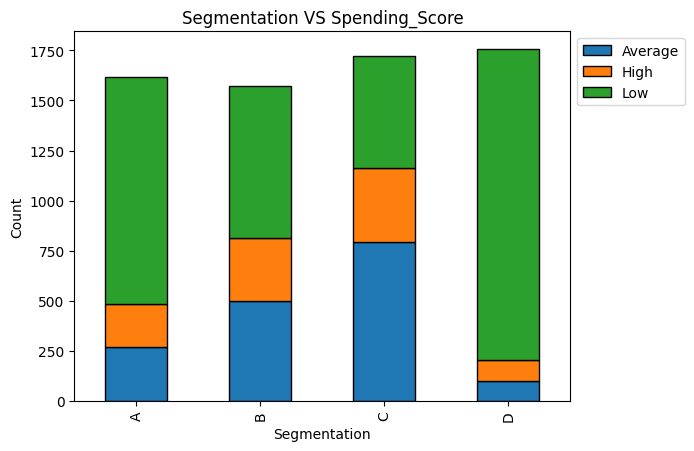

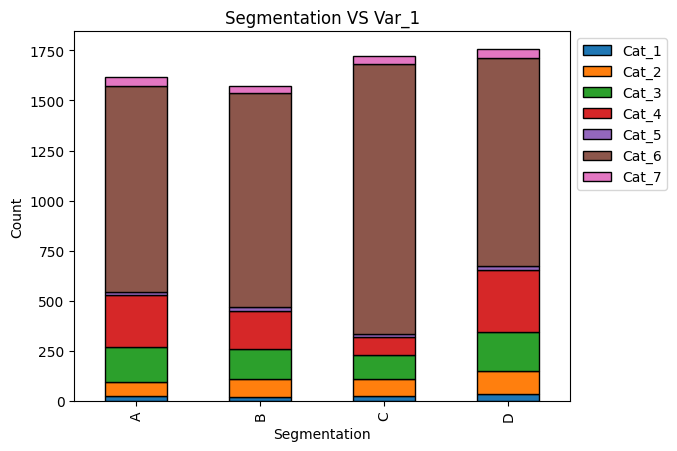

In [26]:
# Creating plots of Segmentation VS Factors
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Gender', 'Segmentation VS Gender')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Ever_Married', 'Segmentation VS Ever_Married')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Age_Groups', 'Segmentation VS Age_Groups')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Graduated', 'Segmentation VS Graduated')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Profession', 'Segmentation VS Profession')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Work_Experience', 'Segmentation VS Work_Experience')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Spending_Score', 'Segmentation VS Spending_Score')
plot_stacked_barplots(train_df_cleaned, 'Segmentation', 'Var_1', 'Segmentation VS Var_1')

## Preprocessing Data for Predictive Modelling
Most machine learning algorithms work with numerical values. Therefore, I will use Numerical Representation on all the 'Yes' and 'No' values and One-Hot Encoding on all the categorical values.

In [27]:
# Map 'Yes' to 1 and 'No' to 0 for Binary Columns
binary_columns = ['Ever_Married', 'Graduated']
train_df_cleaned[binary_columns] = train_df_cleaned[binary_columns].replace({'Yes':1, 'No':0})
test_df_cleaned[binary_columns] = test_df_cleaned[binary_columns].replace({'Yes':1, 'No':0})


# Perform One-Hot encoding to categorical columns
columns_to_encode = ['Gender', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation', 'Age_Groups']
train_df_cleaned_encoded = pd.get_dummies(train_df_cleaned, columns=columns_to_encode, prefix=columns_to_encode)
test_df_cleaned_encoded = pd.get_dummies(test_df_cleaned, columns=columns_to_encode, prefix=columns_to_encode)

In [28]:
train_df_cleaned_encoded.head()

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,...,Segmentation_B,Segmentation_C,Segmentation_D,Age_Groups_Below 18,Age_Groups_19-24,Age_Groups_25-34,Age_Groups_35-44,Age_Groups_45-54,Age_Groups_55-64,Age_Groups_65 and above
0,462809,0,22,0,1.0,4.0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2,466315,1,67,1,1.0,1.0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,461735,1,67,1,0.0,2.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
5,461319,1,56,0,0.0,2.0,False,True,True,False,...,False,True,False,False,False,False,False,False,True,False
6,460156,0,32,1,1.0,3.0,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [29]:
test_df_cleaned_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2154 non-null   int64  
 1   Ever_Married              2154 non-null   int64  
 2   Age                       2154 non-null   int64  
 3   Graduated                 2154 non-null   int64  
 4   Work_Experience           2154 non-null   float64
 5   Family_Size               2154 non-null   float64
 6   Gender_Female             2154 non-null   bool   
 7   Gender_Male               2154 non-null   bool   
 8   Profession_Artist         2154 non-null   bool   
 9   Profession_Doctor         2154 non-null   bool   
 10  Profession_Engineer       2154 non-null   bool   
 11  Profession_Entertainment  2154 non-null   bool   
 12  Profession_Executive      2154 non-null   bool   
 13  Profession_Healthcare     2154 non-null   bool   
 14  Profession_Ho

## Predictive Modelling
I will be using the following predictive models:
* Random Forest Classification
* K Nearest Neighbour Classification
* Naive Bayes Classification

### Preprocessing data for predictive modelling

In [30]:
# I will be dropping 'ID' and 'Age' columns as ID is not relevant in the predictive modelling and age is already classified into Age_Groups
columns_to_drop = ['ID', 'Age']
train_df_cleaned_encoded_dropped = train_df_cleaned_encoded.drop(columns=columns_to_drop, axis=1)
test_df_cleaned_encoded_dropped = test_df_cleaned_encoded.drop(columns=columns_to_drop, axis=1)

# Identifying the target columns
target_columns = ['Segmentation_A', 'Segmentation_B', 'Segmentation_C', 'Segmentation_D']

# Split the train and test dataframes into features (X) and Target (y)
X_train = train_df_cleaned_encoded_dropped.drop(columns=target_columns)
X_test = test_df_cleaned_encoded_dropped.drop(columns=target_columns)
y_train = train_df_cleaned_encoded_dropped[target_columns]
y_test = test_df_cleaned_encoded_dropped[target_columns]

### Random Forest Classification

In [31]:
# Initialise and train the Random Forest classification model
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

# Make predictions of the test data frame
y_pred = rf_classifier.predict(X_test)

# Convert y-pred into a dataframe
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_df)
print('Classification Report:')
print(classification_report(y_test, y_pred_df, zero_division=1))
print(f"Accuracy of model: {accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.21      0.26       692
           1       0.23      0.19      0.21       450
           2       0.23      0.30      0.26       381
           3       0.42      0.37      0.40       631

   micro avg       0.32      0.27      0.29      2154
   macro avg       0.31      0.27      0.28      2154
weighted avg       0.32      0.27      0.29      2154
 samples avg       0.41      0.27      0.27      2154

Accuracy of model: 0.26973073351903437


### K Nearest Neighbors Classification

In [32]:
# Initialise and train the K Nearest Neighbor (KNN) model
knn_classifier = RandomForestClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions of the test data frame
y_pred = knn_classifier.predict(X_test)

# Convert y-pred into a dataframe
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_df)
print('Classification Report:')
print(classification_report(y_test, y_pred_df, zero_division=1))
print(f"Accuracy of model: {accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.22      0.27       692
           1       0.23      0.19      0.21       450
           2       0.24      0.31      0.27       381
           3       0.42      0.37      0.39       631

   micro avg       0.32      0.27      0.30      2154
   macro avg       0.32      0.27      0.29      2154
weighted avg       0.33      0.27      0.29      2154
 samples avg       0.43      0.27      0.27      2154

Accuracy of model: 0.27298050139275765


### Naive Bayes Classification

In [33]:
# Reverse one-hot encoding for target variables (y)
y_train_original = np.argmax(y_train, axis=1)
y_test_original = np.argmax(y_test, axis=1)

# Initialise and train the Naive Bayes classification model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train_original)

# Make predictions of the test data frame
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test_original, y_pred)
print('Classification Report:')
print(classification_report(y_test, y_pred_df, zero_division=1))
print(f"Accuracy of model: {accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.22      0.27       692
           1       0.23      0.19      0.21       450
           2       0.24      0.31      0.27       381
           3       0.42      0.37      0.39       631

   micro avg       0.32      0.27      0.30      2154
   macro avg       0.32      0.27      0.29      2154
weighted avg       0.33      0.27      0.29      2154
 samples avg       0.43      0.27      0.27      2154

Accuracy of model: 0.33379758588672237


## Conclusion
I have done the following in this analysis:
* Imported the dataset and libraries
* Cleaned the dataset to drop NaN values and ensure that there is no unusual values
* Visualised the dataset to gain a deeper understanding of it
* Prepared the data for predictive modelling
* Performed 3 predictive modelling techniques (Random Forest, K Nearest Neighbors and Naive Bayes)

The accuracy of the best model (Naive Bayes) is 0.33.

### Ways to improve
* Fill NaN values instead of dropping them as dropping them reduces the sample size substantially
* Consider using label encoding instead of one-hot encoding
* Perform features extraction techniques and hyperparameter tuning to improve the performance of the models